# Digit recognizer
This is a model intended to recognize hand written numbers and categorize them<br>
First we will import some necessary libraries

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# Import the test and train files

In [2]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

Visualize the train data and the shape

In [11]:
print("Train shape: ",train.shape)
train.head(10)

Train shape:  (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Preprocess the data

Separate the target and the labels into Y and x respectively

In [3]:
train_Y = train['label']
train_x = train.drop(['label'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_Y, val_Y=train_test_split(train_x, train_Y, test_size=0.2, random_state=42)

Sort the pixels of each of the 42000 rows into a 28x28 matrix so we can feed it to the Convolutional layers

In [5]:
train_x = tf.reshape(train_x, (train_x.shape[0], 28, 28, 1))
val_x = tf.reshape(val_x, (val_x.shape[0], 28, 28, 1))

In [6]:
from keras.utils.np_utils import to_categorical
val_Y=to_categorical(val_Y,num_classes=10)
train_Y=to_categorical(train_Y,num_classes=10)

# Make the model

In [26]:
model = Sequential()

model.add(Lambda(lambda x: x/255.0, input_shape=(28, 28, 1)))
model.add(Conv2D(4, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(2, 2, activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

optimizer = keras.optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])

In [27]:
history = model.fit(
    x=train_x,
    y=train_Y,
    batch_size=200,
    epochs=25,
    validation_data=(val_x, val_Y))

Epoch 1/25
168/168 [==============================] - 6s 29ms/step - loss: 1.7378 - accuracy: 0.3730 - val_loss: 0.8191 - val_accuracy: 0.8260
Epoch 2/25
168/168 [==============================] - 5s 30ms/step - loss: 1.0970 - accuracy: 0.6115 - val_loss: 0.5274 - val_accuracy: 0.8751
Epoch 3/25
168/168 [==============================] - 5s 28ms/step - loss: 0.9623 - accuracy: 0.6554 - val_loss: 0.4316 - val_accuracy: 0.8892
Epoch 4/25
168/168 [==============================] - 5s 28ms/step - loss: 0.9047 - accuracy: 0.6775 - val_loss: 0.4003 - val_accuracy: 0.8938
Epoch 5/25
168/168 [==============================] - 5s 29ms/step - loss: 0.8541 - accuracy: 0.6919 - val_loss: 0.3705 - val_accuracy: 0.9042
Epoch 6/25
168/168 [==============================] - 5s 27ms/step - loss: 0.8274 - accuracy: 0.7001 - val_loss: 0.3430 - val_accuracy: 0.9050
Epoch 7/25
168/168 [==============================] - 5s 27ms/step - loss: 0.7967 - accuracy: 0.7090 - val_loss: 0.3148 - val_accuracy: 0.9171

# Visualization of the loss

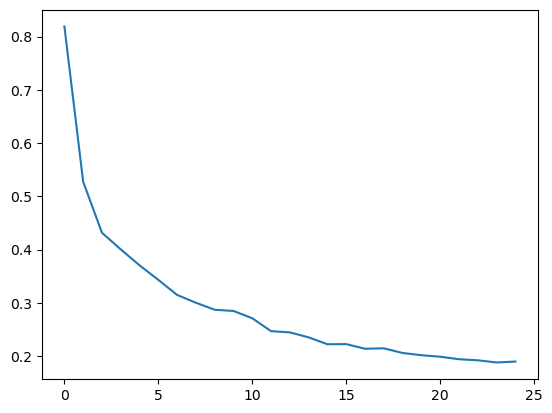

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_loss'])

# The predicted and actual numbers

In [25]:
predicted = model.predict(val_x)

print('Predicted: ', np.argmax(predicted, axis=1))
print('Actual: ', np.argmax(val_Y, axis=1))

263/263 [==============================] - 1s 2ms/step
Predicted:  [8 1 9 ... 3 0 9]
Actual:  [8 1 9 ... 3 0 9]


**The drawings of the first three numbers** <br>
Model has an accuracy of around 95% on the validation data

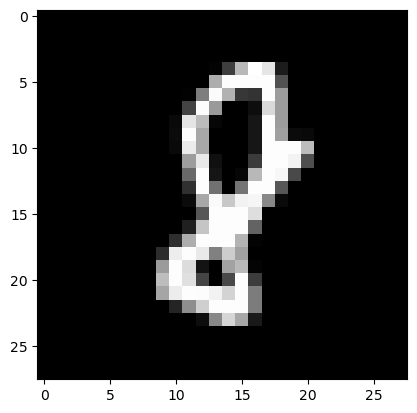

In [33]:
plt.imshow(val_x[0], cmap='gray')
plt.show()

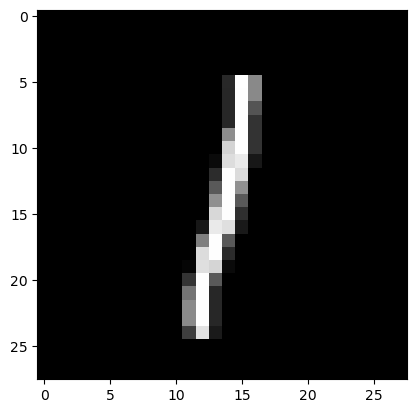

In [34]:
plt.imshow(val_x[1], cmap='gray')
plt.show()

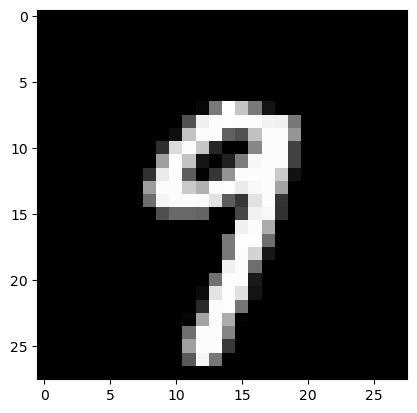

In [35]:
plt.imshow(val_x[2], cmap='gray')
plt.show()

# Submission for the competition on Kaggle

In [60]:
test = tf.reshape(test, (test.shape[0], 28, 28, 1))
submission = model.predict(test)
submission = np.argmax(submission, axis=1)

875/875 [==============================] - 4s 4ms/step


In [42]:
ids = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [61]:
submission = pd.DataFrame({"ImageId":ids['ImageId'], "Label":submission})
print(submission)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      7
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [66]:
submission.to_csv("submission.csv",index=None)